trying from https://www.youtube.com/shorts/_m0SfU4EfHE

In [1]:
from phi.flow import plot, StaggeredGrid, extrapolation, vec, Box, advect, diffuse, fluid, iterate, math, batch, vis
# import math
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
from matplotlib.animation import FuncAnimation
import os

c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\phi\field\_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)
c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\phi\field\_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)
c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\phi\field\_field_math.py:521: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  if isinstan

<Figure size 864x360 with 1 Axes>

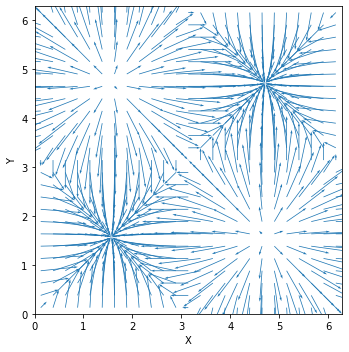

In [2]:
## taylor-green vortex
V = StaggeredGrid(
    values = lambda pos: vec(
        x = math.cos(pos).vector["x"] * math.sin(pos).vector["y"],
        y = math.sin(pos).vector["x"] * math.cos(pos).vector["y"],
    ),
    ## periodic
    extrapolation = extrapolation.PERIODIC,
    # 25 degrees of freedom each axis
    x = 25,
    y = 25,
    bounds = Box(x = 2 * math.pi, y = 2 * math.pi),
)
plot(V)

MovieWriter ffmpeg unavailable; using Pillow instead.
c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\phi\field\_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)
c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\phi\field\_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)
c:\Users\ryanl\AppData\Local\Programs\Python\Python39\lib\site-packages\phi\field\_field_math.py:521: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_cen

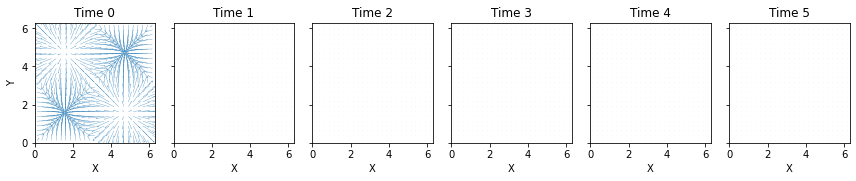

In [15]:
import imageio
# plt.rcParams['animation.ffmpeg_path'] = "c:/users/ryanl/appdata/local/programs/python/python39/lib/site-packages/ffmpeg"

def make_step(v , dt=0.1):
    ## unconditionally stable
    v = advect.semi_lagrangian(v, v , dt=dt)
    v = diffuse.implicit(v , 0.1, dt)

    ## solve pressure-correction problem to project velocity field to incompressibility
    v, _ = fluid.make_incompressible(v)
    return v

trajectory = iterate(make_step, batch(time=5), V)



output_path = os.path.join(os.getcwd(), 'animation.gif')

viewer = vis.plot(trajectory)
plot(trajectory, animate="time").save(output_path)


